In [55]:
# First show that the performance improvement training with ccc and with kde diff over the baseline
score_metrics = [r'TVD$\downarrow$', r'JSD$\downarrow$', r'Activation CCC$\uparrow$', r'Valence CCC$\uparrow$']
baseline_scores = [.515,.213,.673,.573]
baseline_stds = [.004,.003,.008,.020]
mt_scores = [.503,.211,.741,.571]
mt_stds = [.001,.001,.005,.005]

([<matplotlib.axis.XTick at 0x7f2057d5fd70>,
 [Text(1.25, 0, 'Baseline'), Text(2.5, 0, 'Annotator Prediction')])

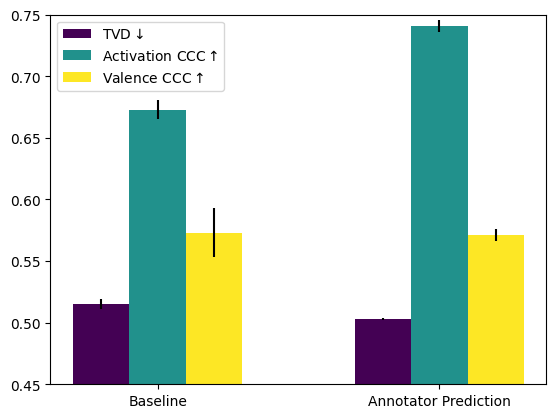

In [60]:
import matplotlib.pyplot as plt
import matplotlib
# JSD looks bad included on the plot -- skip
if len(score_metrics) == 4:
    remove_jsd = lambda x: [x[0]] + x[2:]
    score_metrics = remove_jsd(score_metrics)
    baseline_scores = remove_jsd(baseline_scores)
    baseline_stds = remove_jsd(baseline_stds)
    mt_scores = remove_jsd(mt_scores)
    mt_stds = remove_jsd(mt_stds)

cmap = matplotlib.colormaps['viridis']
cmap_max = len(score_metrics)-1
cmap_min = 0
rescale = lambda index: (index - cmap_min) / (cmap_max - cmap_min)
for i, metric in enumerate(score_metrics):
    scores = [baseline_scores[i], mt_scores[i]]
    stds = [baseline_stds[i], mt_stds[i]]
    increment = i * 0.25
    plt.bar([1+increment, 2.25+increment], scores, width=0.25, yerr=stds, label=metric, color=cmap(rescale(i)))
# tvd_scores = [baseline_scores[0], mt_scores[0]]
# plt.bar([1,2,3,4], baseline_scores, label='baseline')
plt.legend(loc='upper left')
plt.ylim(0.45,.750)
plt.xticks([1.25,2.5], labels=['Baseline', 'Annotator Prediction'])

([<matplotlib.axis.XTick at 0x7f2056977ad0>,
 [Text(1.25, 0, 'Baseline'), Text(2.5, 0, 'Annotator Prediction')])

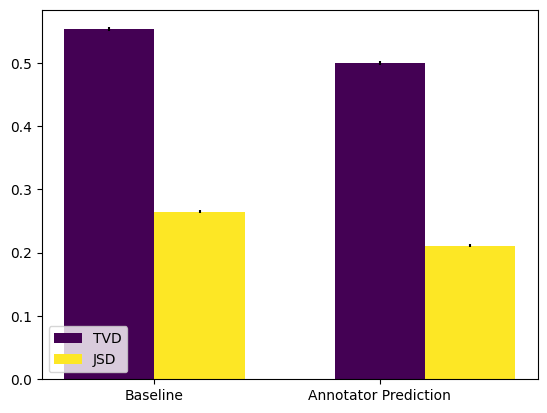

In [75]:
# Comparison with and without DiffKDE
without = [0.553, 0.265]
without_err = [0.003, 0.002]
with_ = [0.5, 0.211]
with_err = [0.003, 0.002]
score_metrics = ['TVD', 'JSD']

cmap = matplotlib.colormaps['viridis']
cmap_max = len(score_metrics)-1
cmap_min = 0
rescale = lambda index: (index - cmap_min) / (cmap_max - cmap_min)
for i, metric in enumerate(score_metrics):
    scores = [without[i], with_[i]]
    stds = [without_err[i], with_err[i]]
    increment = i * 0.5
    plt.bar([1+increment, 2.5+increment], scores, width=0.5, yerr=stds, label=metric, color=cmap(rescale(i)))
# tvd_scores = [baseline_scores[0], mt_scores[0]]
# plt.bar([1,2,3,4], baseline_scores, label='baseline')
plt.legend(loc='lower left')
# plt.ylim(0.45,.750)
plt.xticks([1.25,2.5], labels=['Normal KDE', 'Differentiable KDE'])

In [61]:
# Cross Corpus Results
score_metrics = 'TVD'
datasets = ['MSP-Podcast', 'IEMOCAP', 'MuSE']
baseline_scores = [0.601, 0.633, 0.530]
baseline_stds = [0.003, 0.002, 0.004]
mt_scores = [0.518, 0.613, 0.470]
mt_stds = [0.005, 0.002, 0.002]

([<matplotlib.axis.XTick at 0x7f205755dac0>,
 [Text(1.3333333333333333, 0, 'Baseline'),
  Text(2.6666666666666665, 0, 'Annotator Prediction')])

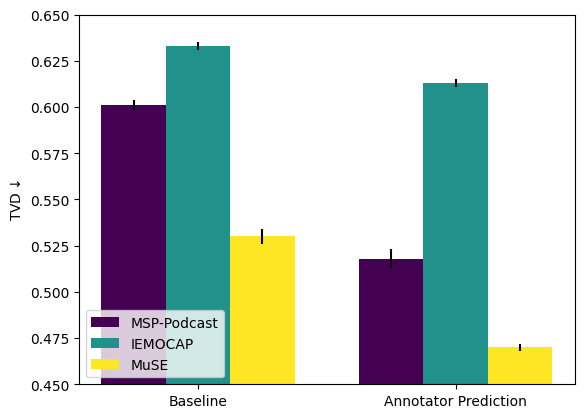

In [72]:
import matplotlib.pyplot as plt
import matplotlib

cmap = matplotlib.colormaps['viridis']
cmap_max = len(datasets)-1
cmap_min = 0
rescale = lambda index: (index - cmap_min) / (cmap_max - cmap_min)
for i, dataset in enumerate(datasets):
    scores = [baseline_scores[i], mt_scores[i]]
    stds = [baseline_stds[i], mt_stds[i]]
    increment = i * 1/3
    plt.bar([1+increment, 2+(1/3)+increment], scores, width=1/3, yerr=stds, label=dataset, color=cmap(rescale(i)))
# tvd_scores = [baseline_scores[0], mt_scores[0]]
# plt.bar([1,2,3,4], baseline_scores, label='baseline')
plt.legend(loc='lower left')
plt.ylim(0.45,.65)
plt.ylabel(r'TVD$\downarrow$')
plt.xticks([1+(1/3),2.5+(1/6)], labels=['Baseline', 'Annotator Prediction'])